In [22]:
import numpy as np
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
from utils.freq_calculator import do_bandpass, prepare_fft
import copy


from utils.lag_calculator import (
    prepare_idun_data,
    fill_data_gaps
)
import config

In [23]:
folder = "01_Pre_study"
subject = "S003"
night = "night3"
idun_file_ending = "eeg"


In [24]:

# csv_file_path = glob.glob(os.path.join(folder, subject, night, "*eeg.csv"))[0]
csv_file_path = glob.glob(
    os.path.join(folder, subject, night, f"*{idun_file_ending}.csv")
)[0]
# upload csv file using numpy
idun_raw_data = np.genfromtxt(csv_file_path, delimiter=",", skip_header=1)
idun_start_time = idun_raw_data[0][0]



In [25]:
idun_base_data, idun_filtered_data, idun_time_stamps = prepare_idun_data(
    idun_raw_data, config
)

Text(0.5, 1.0, 'IDUN Highpassed data')

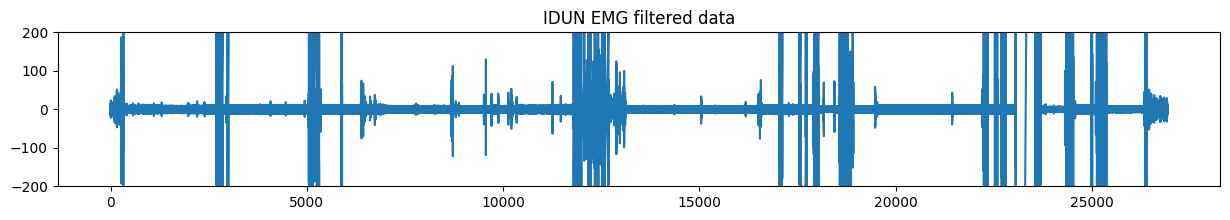

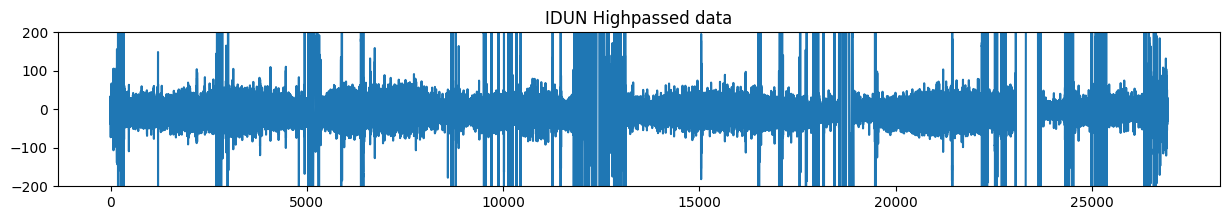

In [26]:
plt.figure(figsize=(15, 2))
plt.plot(idun_time_stamps, idun_filtered_data)
plt.ylim(-200, 200)
plt.title("IDUN EMG filtered data")

plt.figure(figsize=(15, 2))
plt.plot(idun_time_stamps, idun_base_data)
plt.ylim(-200, 200)
plt.title("IDUN Highpassed data")

In [27]:
_, new_data_points = fill_data_gaps(idun_time_stamps, idun_base_data)
# creaet new time stamps using idun_start_time as a startting point and 1/SAMPLE_RATE as a step, and lenght of new_data_points
new_time_stamps = np.linspace(
    idun_start_time, idun_start_time + 1 / config.IDUN_SAMPLE_RATE * len(new_data_points), len(new_data_points)
)

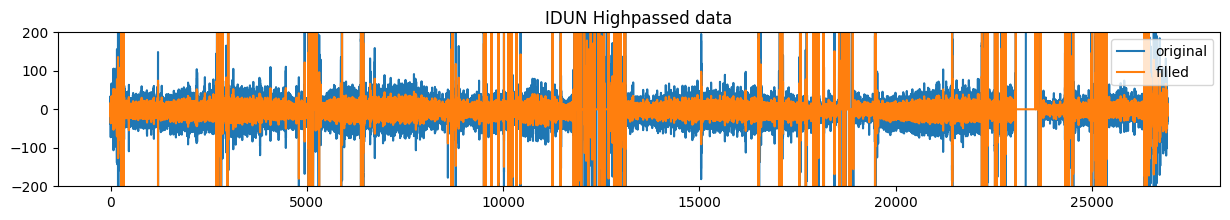

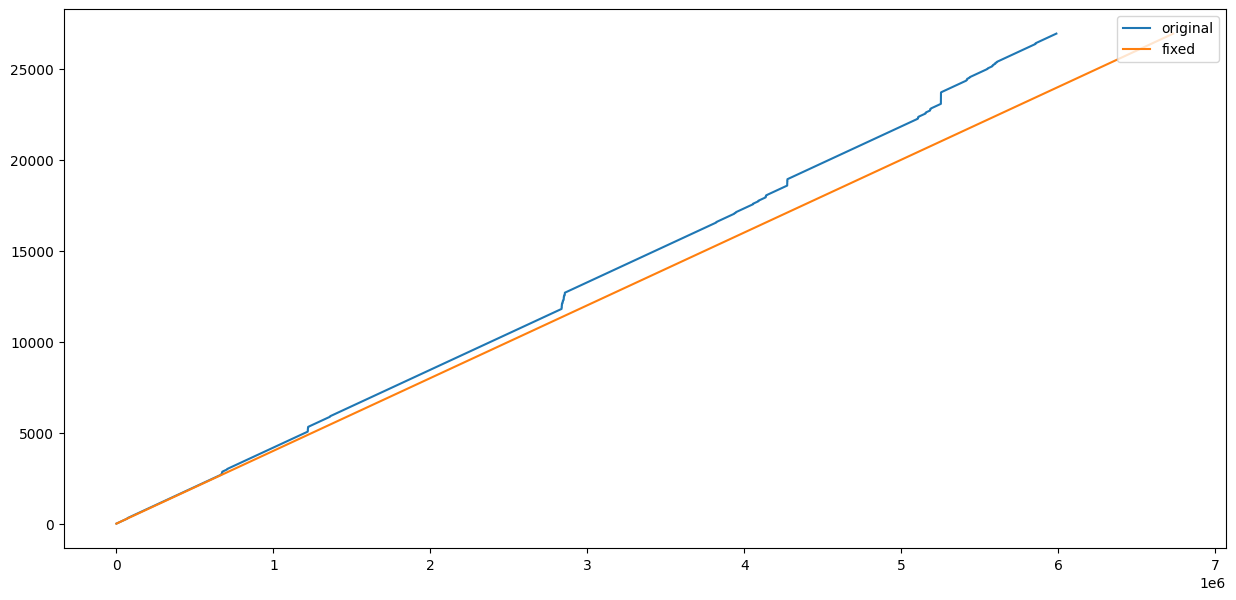

In [28]:
plt.figure(figsize=(15, 2))
plt.plot(idun_time_stamps,idun_base_data, label = "original")
plt.plot(new_time_stamps-new_time_stamps[0],0.5*new_data_points, label = "filled")
plt.ylim(-200, 200)
plt.title("IDUN Highpassed data")
plt.legend(loc = "upper right")

# plot the timestamps
plt.figure(figsize=(15, 7))
plt.plot(idun_time_stamps, label = "original")
plt.plot(new_time_stamps-new_time_stamps[0], label = "fixed")
plt.legend(loc = "upper right")

### Save data

In [29]:
# Save as csv withe these headers timestamp,ch1 at the original path
new_data = np.vstack((new_time_stamps, new_data_points)).T
new_data = pd.DataFrame(new_data, columns=["timestamp", "ch1"])
new_path = csv_file_path.replace(".csv", "_fixed.csv")
new_data.to_csv(new_path, index=False)